## Support Vector Regression (SVR)

### Dataset context

You have an HR department in your company and you're hiring people for some open positions.
Once you've interviewed a candidate, you can give her/his an offer and then ask the question about the expected salary.
So, you need to use the available data about positions and levels to validate what the candidate coud be asking for his/her salary.

In [3]:
DATASET_PATH = "../../../../datasets/ml_az_course/004_position_salaries.csv"

### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Importing the dataset

In [4]:
dataset = pd.read_csv(DATASET_PATH)
x = dataset.iloc[:, 1:-1].values # we don't use first column "Position"
y = dataset.iloc[:, -1].values # 1D-array

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
# convert dependent feature, y, into a 2D array, in  order to do feature scaling.
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
# we can use the same scaler for X an Y, because they have different standard deviation
sc_x = StandardScaler()
sc_y = StandardScaler()

In [9]:
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR

Since the value of the RBF kernel decreases with distance and ranges between zero (in the limit) and one (when x = x'), it has a ready interpretation as a similarity measure.
More info: https://en.wikipedia.org/wiki/Radial_basis_function_kernel

In [11]:
regressor = SVR(kernel="rbf") # Radial Basis Function Kernel

In [12]:
regressor.fit(X=x, y=y)

/home/david/anaconda3/envs/ml_az/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new result

In [15]:
levels = [[6.5]]
raw_preds = regressor.predict(sc_x.transform(levels))
# use the original scale of salaries
preds = sc_y.inverse_transform([raw_preds])
preds

array([[170370.0204065]])

### Visualising the SVR results

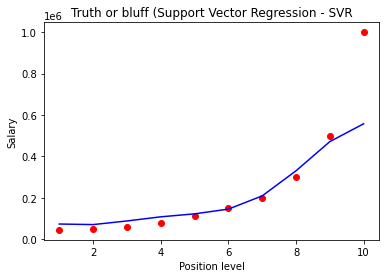

In [16]:
plt.scatter(x=sc_x.inverse_transform(x), y=sc_y.inverse_transform(y), color="red")
y_preds = sc_y.inverse_transform(regressor.predict(x).reshape(-1, 1))
plt.plot(sc_x.inverse_transform(x), y_preds, color="blue")
plt.title("Truth or bluff (Support Vector Regression - SVR")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

### Visualising the SVR results (for higher resolution and smoother curve)

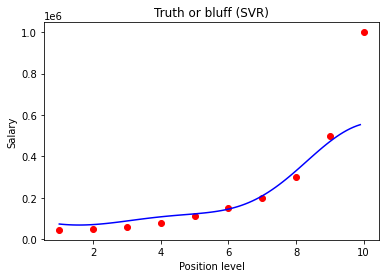

In [17]:
orig_x = sc_x.inverse_transform(x)
orig_y = sc_y.inverse_transform(y)

x_grid = np.arange(start=min(orig_x), stop=max(orig_x), step=0.1)

x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x=orig_x, y=orig_y, color="red")
y_preds = sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1, 1))
plt.plot(x_grid, y_preds, color="blue")
plt.title("Truth or bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()